In [2]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows', None)
#test change

### Data Sources
This section uses the Data from the Company Summary table. We specifically are looking at the Industry categories and Sex.

### Step 1

Using our US Census api key we call the requests library in python. This allows us to get a file from the us census with all the data from the Company Summary table. We do two seperate calls to get a table with all the data grouped by state and a table with the US data overall. We then turn this data into json format so that it can be imported into the python library pandas.

In [3]:
#create variables for our api key, variables, and urls
apikey = 'af4a7c461bcda111515e0ebeea5e4124fcc267d6'
get = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F'
url = f"https://api.census.gov/data/2018/abscs?get={get}&for=us:*&key={apikey}"
stateurl = url = f"https://api.census.gov/data/2018/abscs?get={get}&for=state:*&key={apikey}"

#request usa data
r = requests.get(url)
print(r)

#request state data
stater = requests.get(stateurl)
print(stater)

#dump the usa data into variables
r = r.json()
r = json.dumps(r)

#dump the state data into variables
stater = stater.json()
stater = json.dumps(stater)

<Response [200]>
<Response [200]>


### Step 2 Transformation
We first start by removing colums that we are not going to use. For any column that had both a category number and label we removed the number and only kept the label column. This allows us to see the names of the categories which is more usefull for understanding then the numbers. Next we renamed the colums so they were easier to understand. We did this same process for both us and state data and named the two tables usadata and statedata which we use later for graphing.

In [48]:
#converted to json
p = pd.read_json(r)

#created dataframe
headers = p.iloc[0]
new_p  = pd.DataFrame(p.values[1:], columns=headers)
#remove columns we don't need
new_p = new_p.drop(columns =['SEX', 'ETH_GROUP', 'RACE_GROUP', 'VET_GROUP', 'EMPSZFI', 'FIRMPDEMP_S_F', 'PAYANN_S_F', 'YEAR','RCPPDEMP_S_F', 'FIRMPDEMP_F', 'RCPPDEMP_F', 'EMP_F', 'EMP_S_F'])

#renamed columns
usadata = new_p.rename({"NAICS2017_LABEL": "Industry", 
                    "SEX_LABEL": "Sex",
                    "FIRMPDEMP": "EmpFirms",
                    "ETH_GROUP_LABEL": "Eth", 
                    "RACE_GROUP_LABEL": "Race", 
                    "VET_GROUP_LABEL": "Vet", 
                    "EMPSZFI_LABEL": "EMPSZFI"}, 
                    axis='columns')

#usadata.info()

In [49]:
#converted to json
statedatap = pd.read_json(stater)

#created dataframe
headers = statedatap.iloc[0]
statedata  = pd.DataFrame(statedatap.values[1:], columns=headers)

#remove columns we don't need
statedata = statedata.drop(columns =['ETH_GROUP', 'RACE_GROUP', 'VET_GROUP', 'EMPSZFI', 'FIRMPDEMP_S_F', 'PAYANN_S_F', 'YEAR','RCPPDEMP_S_F','EMP_S_F', 'FIRMPDEMP_F'])

#renamed columns
statedata = statedata.rename({"NAICS2017_LABEL": "Industry",
                    "SEX_LABEL": "Sex",  
                    "ETH_GROUP_LABEL": "Eth", 
                    "FIRMPDEMP": "EmpFirms", 
                    "RACE_GROUP_LABEL": "Race", 
                    "VET_GROUP_LABEL": "Vet", 
                    "NAME": "Name",
                    "EMPSZFI_LABEL": "EMPSZFI"}, 
                    axis='columns')
#statedata.info()

### Step 3 Visulization table 1

For The first visulization we create two tables for ammount of employer firms by state by the top two Industries. This is done by first converting the Employer Firms column into an int and then  grouping by the sum of top industry and sorting their values.

In [7]:
#new table for the count by state for Professional, scientific, and technical services
statecount = statedata[['Name','EmpFirms', 'Industry']]
statecount['EmpFirms'] = statecount['EmpFirms'].astype('int')
statecount = statecount[(statecount['Industry']=='Professional, scientific, and technical services')]

#grouped by sum 
statecount = statecount.groupby(['Name'], as_index=False)['EmpFirms'].sum()

#sorted and renamed a column
statecount.sort_values(by='EmpFirms', ascending=False, inplace=True)
statecount.rename(columns={'EmpFirms': 'Science'}, inplace=True)

#statecount.head(100)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_13340\242891092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statecount['EmpFirms'] = statecount['EmpFirms'].astype('int')


In [31]:
#new table for the count by state for Manufacturing

statecountu = statedata[['Name','EmpFirms', 'Industry']]
statecountu['EmpFirms'] = statecountu['EmpFirms'].astype('int')
statecountu = statecountu[(statecountu['Industry']=='Manufacturing')]

#grouped by sum 
statecountu = statecountu.groupby(['Name'], as_index=False)['EmpFirms'].sum()

#sorted and renamed a column
statecountu.sort_values(by='EmpFirms', ascending=False, inplace=True)
statecountu.rename(columns={'EmpFirms': 'Manufacturing'}, inplace=True)


C:\Users\Daniel\AppData\Local\Temp\ipykernel_13340\1201747683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statecountu['EmpFirms'] = statecountu['EmpFirms'].astype('int')


### Step 4 Seaborn
We join the two tables above into one and graph it using seaborn

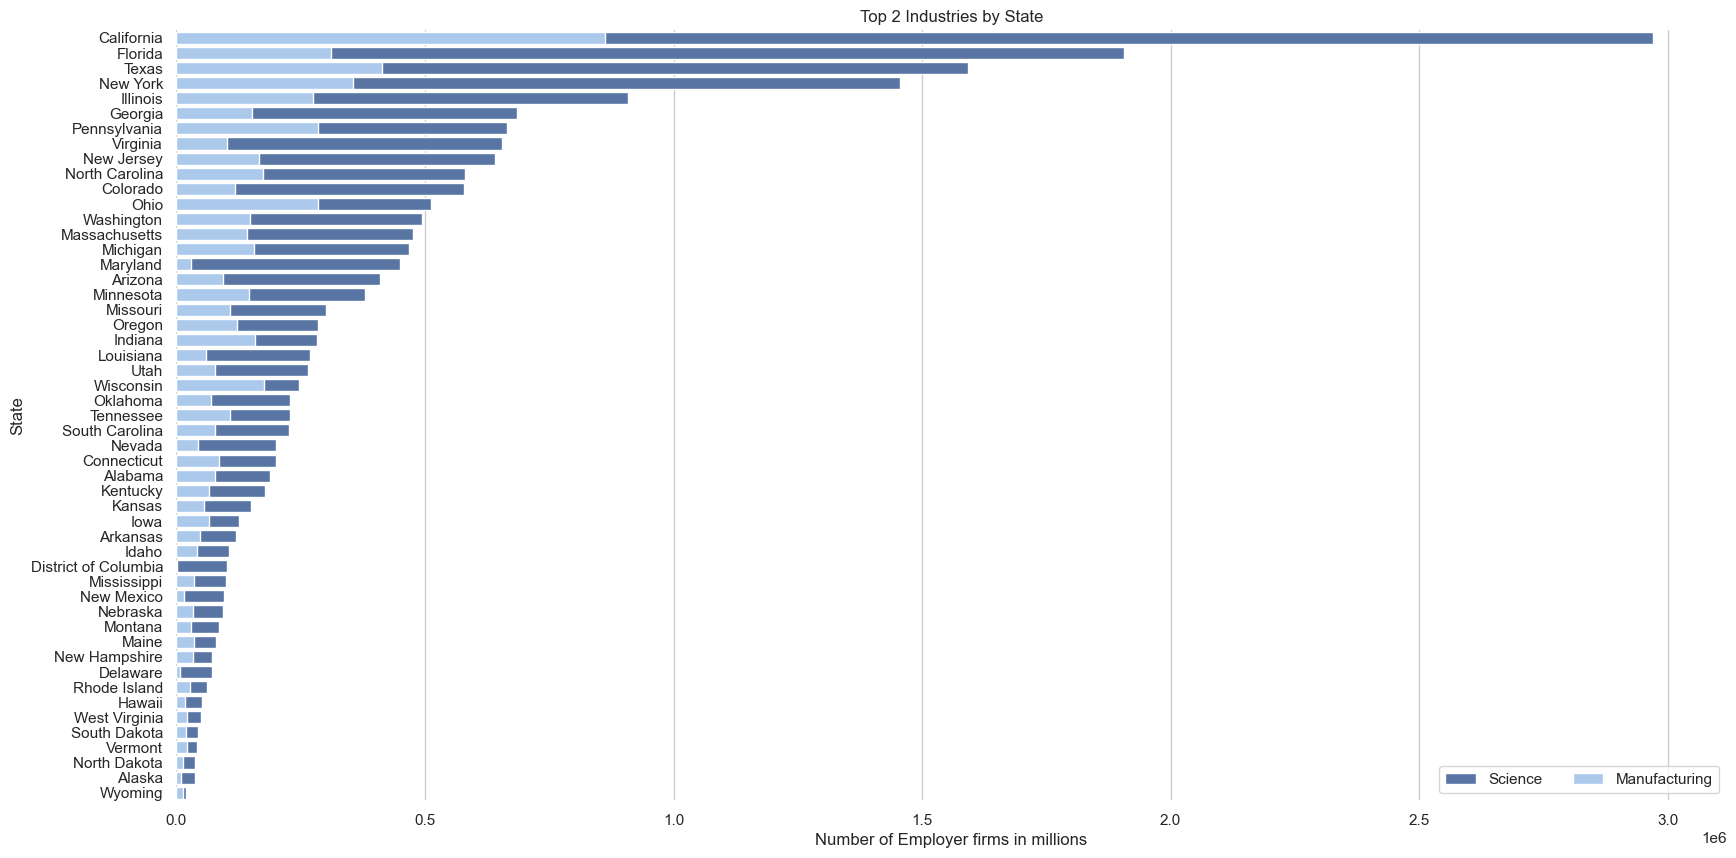

In [50]:
#Joined the two tables, sorted, and graphed
statecategoriesjoin = pd.merge(statecountu, statecount, on='Name')
statecategoriesjoin.sort_values(by='Science', ascending=False, inplace=True)

#Graphed with seaborn
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(20,10))
sns.set_color_codes("deep")
sns.barplot(x="Science", y="Name", data=statecategoriesjoin,
            label="Science", color="b")    
sns.set_color_codes("pastel")
sns.barplot(x="Manufacturing", y="Name", data=statecategoriesjoin,
            label="Manufacturing", color="b")
      
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="State")
ax.set(xlabel="Number of Employer firms in millions")
ax.set(title="Top 2 Industries by State")
sns.despine(left=True, bottom=True)

### Visulization 2
Next visulization is the overall ammount of employer firms accross the United State by Industry. It is graphed using matplotlib

<BarContainer object of 20 artists>

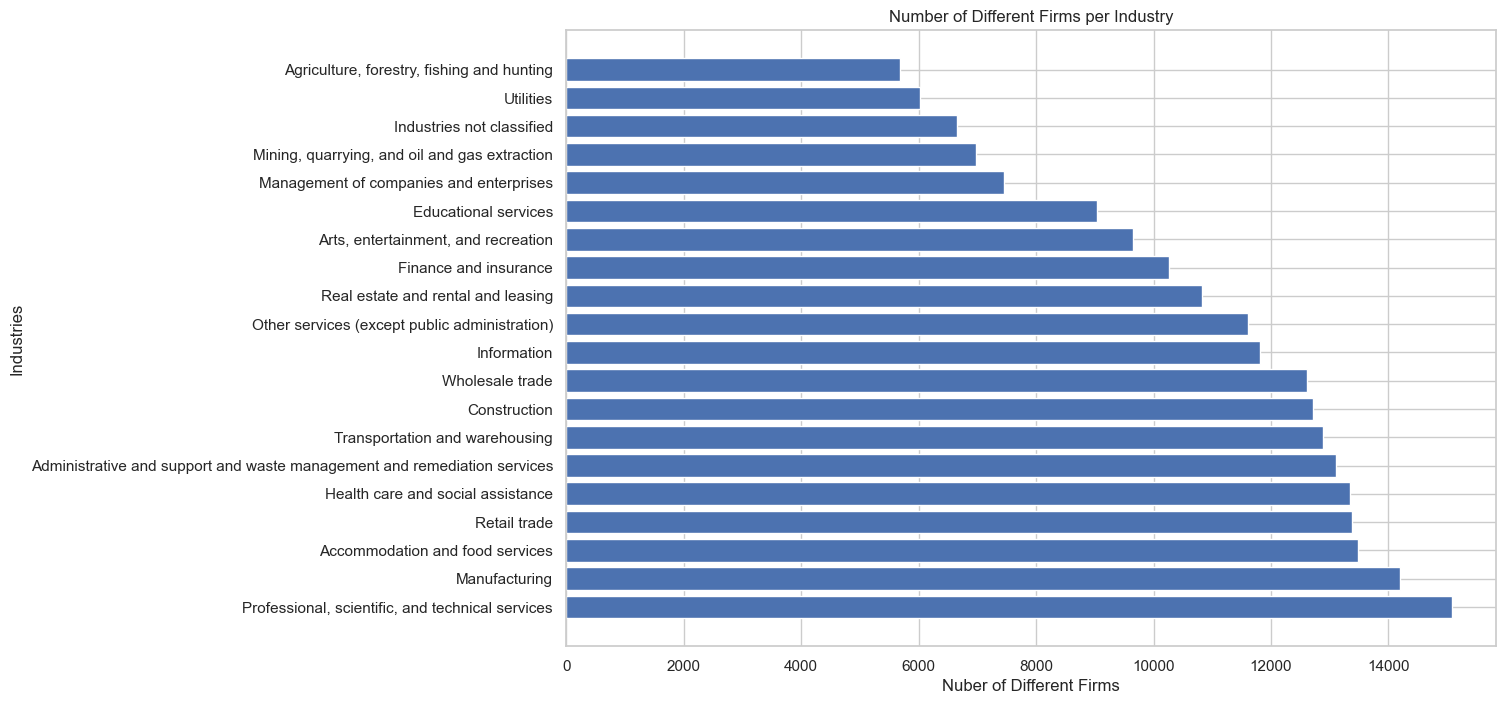

In [43]:
#Create new table for industry across the us
itotal = usadata[['Industry']]
itotal = itotal.groupby('Industry').size().reset_index(name='count')

#Sorted table
itotal.sort_values(by='count', ascending=False, inplace=True)

#Removed the totals which would scew the data
itotal = itotal[(itotal['Industry']!='Total for all sectors')]

#Graphed using matplotlib
plt.figure(figsize = (12, 8))
plt.title("Number of Different Firms per Industry")
plt.xlabel("Nuber of Different Firms")
plt.ylabel("Industries")
#barplot
plt.barh(y = itotal['Industry'], width = itotal['count'])

### Visulization 3
We created a table that seperated the Industries across the United States by Sex and then graphed it using matplotlib 

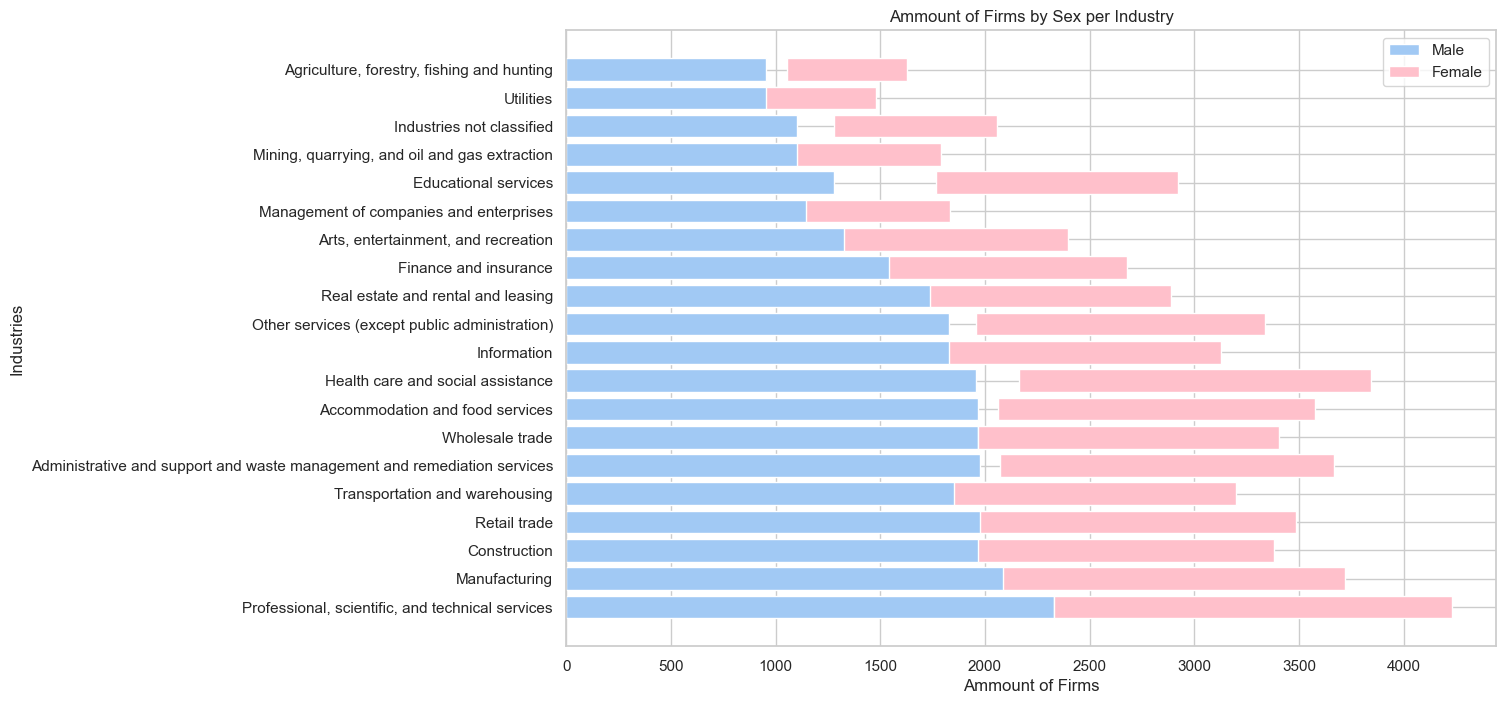

In [51]:
#New table for Industries and sex
itotal = usadata[['Industry','Sex']]
itotal = itotal.groupby(['Industry', 'Sex']).size().reset_index(name='count')

#removed totals and sorted
itotal = itotal[(itotal['Industry']!='Total for all sectors')]
itotal = itotal[(itotal['Sex']!='Total')]
itotal.sort_values(by='count', ascending=False, inplace=True)

#created 3 tables for Male, Female, and Equally Male/female
imale = itotal[(itotal['Sex']=='Male')]
ifemale = itotal[(itotal['Sex']=='Female')]
iboth = itotal[(itotal['Sex']=="Equally male/female")]


#graphed both male and female together using matplotlib
plt.figure(figsize = (12, 8))
plt.barh(imale['Industry'],imale['count'], height=0.8, color='b')
plt.barh(ifemale['Industry'],ifemale['count'], color='pink',height=0.8, left=imale['count'])
plt.legend(["Male", "Female"])
plt.xlabel("Ammount of Firms")
plt.ylabel("Industries")
plt.title("Ammount of Firms by Sex per Industry")
plt.show()



### Visulization 4
Lastly we graphed companies split by both equally between male and femal to compare to our previous graph 

Text(0, 0.5, 'Industries')

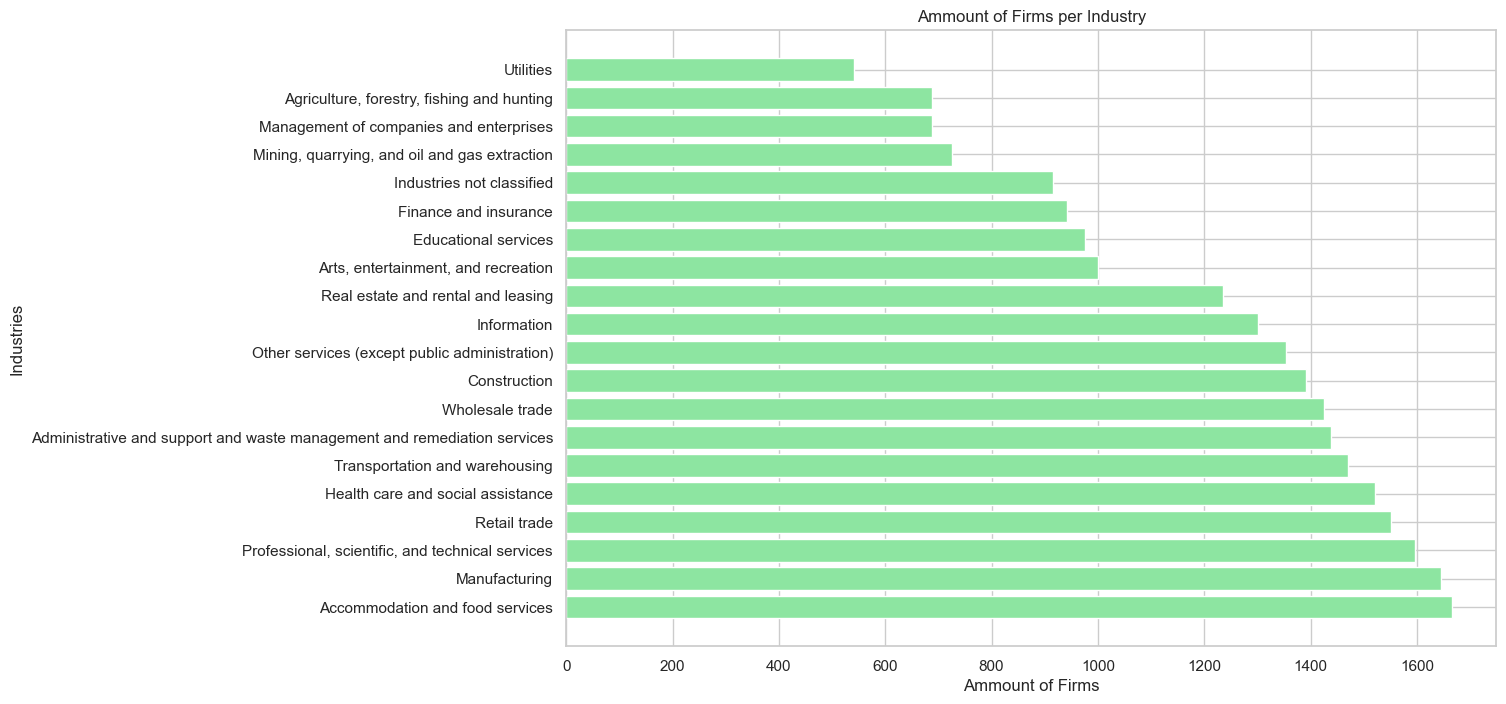

In [52]:
#using matplotlib we graph the table with equally male and female employees
plt.figure(figsize = (12, 8))
plt.barh(iboth['Industry'],iboth['count'], color='g')
plt.title("Ammount of Firms per Industry")
plt.xlabel("Ammount of Firms")
plt.ylabel("Industries")